In [3]:
# Tool Setup

%load_ext tensorboard

import pathlib, os, sys, operator, re, datetime

from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Model
import tensorflow_datasets as tfds
import h5py
import pandas as pd

# Use seaborn for pairplot.
# pip install -q seaborn

import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print(tf.__version__)

2.19.0


# 2024 Dataset

In [3]:

url2 = 'p:\Mitchell\FFNeuralNetwork\statsTesting.csv'

raw_dataset2024 = pd.read_csv(url2, na_values='?', comment='\t', skipinitialspace=True)

dataset2024 = raw_dataset2024.copy()

# dataset2024.tail()

In [4]:
dataset2024.isna().sum()
dataset2024 = dataset2024.dropna(axis = 0, subset = 'Previous Rank')
dataset2024 = dataset2024.fillna(0)
testSet2024 = dataset2024.copy()
# datasetAns = datasetAns.fillna(0)

# dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')

# datasetAns.tail()
# dataset2024.tail()

In [5]:
y = testSet2024[['Rank']]
dataset = dataset2024.drop('Rank', axis = 1)
X = dataset2024[['Previous Rank', 'PPR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)
#
# X.tail()
# dataset.tail()

# Large Dataset

In [6]:
url = 'p:\Mitchell\FFNeuralNetwork\statsTraining.csv'

raw_dataset = pd.read_csv(url, na_values='?', comment='\t', skipinitialspace=True)

dataset = raw_dataset.copy()
# dataset.tail()

dataset.isna().sum()                                                    # Counts number of Nan Values
dataset = dataset.dropna(axis = 0, subset = 'Previous Rank')            # Removes Nan Values from Previous Rank Rows
dataset = dataset.fillna(0)                                             # Fills remaining Nan Values with 0
testSet = dataset.copy()                                                # Copying dataset to testset
dataset = dataset.drop('Next Season Rank', axis = 1)                    # Remove Next Season Rank column from training set

# dataset.tail()

In [7]:
# np.set_printoptions(threshold=sys.maxsize)

Columns = ['Age', 'Previous Rank', 'FantPos', 'Games Played', 'Games Started', 'Cmp', 'Att', 'Pass Yds', 'Pass TD', 
           'Int', 'Rush Att', 'Rush Yds', 'Rush TD', 'Tgt', 'Rec', 'Rec Yds', 'Rec TD', 'Total TD', 'PPR', 'Rank']
y = testSet[['Next Season Rank']]

X_Data = []

for i in range(len(Columns)):
    for l in range(i+1,len(Columns)):
        var1 = Columns[i]
        var2 = Columns[l]
        X = dataset[[var1, var2]]
        # print(X)
        X_Data.append(X)
            
final_data = np.array(X_Data)

In [8]:
X_one = []
X_two = []

for i in range(len(final_data)):    #  171
    X_train, X_test, y_train, y_test = train_test_split(final_data[i], y, test_size=0.2, random_state=42)
    X_one.append(X_train)
    X_two.append(X_test)


In [9]:
final_pred = []

for i in range(len(X_one)):
    model = LinearRegression()
    model.fit(X_one[i], y_train)

    y_pred = model.predict(X_two[i])
    final_pred.append(y_pred)

In [10]:
for i in range(len(final_pred)):
    print("Value being predicted on is", X_two[i][0])
    print("Predicted value is", final_pred[i][0])

Value being predicted on is [27. 48.]
Predicted value is [157.72]
Value being predicted on is [27.  0.]
Predicted value is [193.786]
Value being predicted on is [27.  4.]
Predicted value is [212.942]
Value being predicted on is [27.  4.]
Predicted value is [230.269]
Value being predicted on is [27.  0.]
Predicted value is [226.766]
Value being predicted on is [27.  0.]
Predicted value is [226.798]
Value being predicted on is [27.  0.]
Predicted value is [226.848]
Value being predicted on is [27.  0.]
Predicted value is [226.522]
Value being predicted on is [27.  0.]
Predicted value is [225.707]
Value being predicted on is [27. 54.]
Predicted value is [202.765]
Value being predicted on is [ 27. 232.]
Predicted value is [203.164]
Value being predicted on is [27.  3.]
Predicted value is [189.285]
Value being predicted on is [27.  6.]
Predicted value is [242.908]
Value being predicted on is [27.  6.]
Predicted value is [240.14]
Value being predicted on is [27. 29.]
Predicted value is [242.

# Single Train and Fit Testing

In [15]:
y = testSet[['Next Season Rank']]
X = dataset[['Age', 'Rank']]          # Training on (Previous Rank) and (Previous PPR) vs Next Season Rank
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)

# print(X_train)
# print(X_train.size)
# dataset.tail()

      Age   Rank
0      23    1.0
1      22    2.0
2      25    3.0
3      25    4.0
4      24    5.0
...   ...    ...
3240   24  627.0
3241   27  628.0
3242   24  629.0
3244   27  631.0
3245   29  632.0

[2368 rows x 2 columns]


In [16]:
model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = model.predict(X_test)

print(np.max(y_pred))

322.03780125744936


C:\Users\mdriscoll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


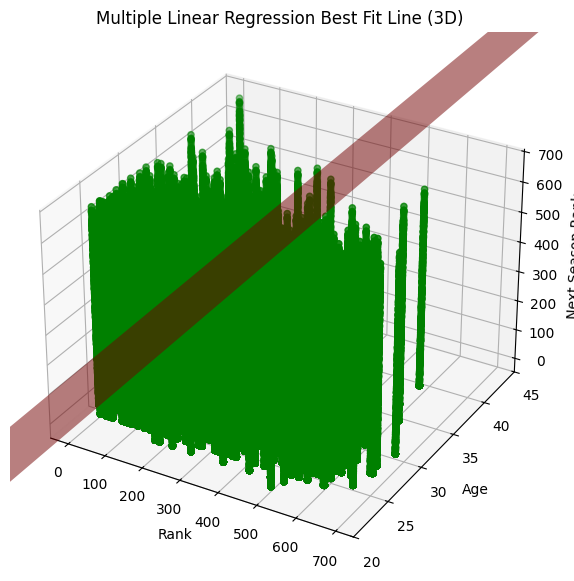

In [32]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Rank'], X_test['Age'],
           y_test, color='green', label='Actual Data')

        #    X_test['FantPos'], X_test['Games Played'], X_test['Games Started'], X_test['Cmp'], X_test['Att'], X_test['Pass Yds'], X_test['Pass TD'], X_test['Int'],
        #    X_test['Rush Att'], X_test['Rush Yds'], X_test['Rush TD'], X_test['Tgt'], X_test['Rec'], X_test['Rec Yds'], X_test['Rec TD'], X_test['PPR']

# x1_range = np.linspace(X_test['Previous Rank'].min(), X_test['Previous Rank'].max(), 100)
x2_range = np.linspace(X_test['Age'].min(), X_test['Age'].max())
# x3_range = np.linspace(X_test['FantPos'].min(), X_test['FantPos'].max(), 100)
# x4_range = np.linspace(X_test['Games Played'].min(), X_test['Games Played'].max(), 100)
# x5_range = np.linspace(X_test['Games Started'].min(), X_test['Games Started'].max(), 100)
# x6_range = np.linspace(X_test['Cmp'].min(), X_test['Cmp'].max(), 100)
# x7_range = np.linspace(X_test['Att'].min(), X_test['Att'].max(), 100)
# x8_range = np.linspace(X_test['Age'].min(), X_test['Age'].max(), 100)
# x9_range = np.linspace(X_test['Pass Yds'].min(), X_test['Pass Yds'].max(), 100)
# x10_range = np.linspace(X_test['Pass TD'].min(), X_test['Pass TD'].max(), 100)
# x11_range = np.linspace(X_test['Int'].min(), X_test['Int'].max(), 100)
# x12_range = np.linspace(X_test['Rush Att'].min(), X_test['Rush Att'].max(), 100)
# x13_range = np.linspace(X_test['Rush Yds'].min(), X_test['Rush Yds'].max(), 100)
# x14_range = np.linspace(X_test['Rush TD'].min(), X_test['Rush TD'].max(), 100)
# x15_range = np.linspace(X_test['Tgt'].min(), X_test['Tgt'].max(), 100)
# x16_range = np.linspace(X_test['Rec'].min(), X_test['Rec'].max(), 100)
# x17_range = np.linspace(X_test['Rec Yds'].min(), X_test['Rec Yds'].max(), 100)
# x18_range = np.linspace(X_test['Rec TD'].min(), X_test['Rec TD'].max(), 100)
# x19_range = np.linspace(X_test['PPR'].min(), X_test['PPR'].max(), 100)
x20_range = np.linspace(X_test['Rank'].min(), X_test['Rank'].max())

x1, x2= np.meshgrid(x2_range, x20_range)
z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_ylim(20, 45)

ax.set_xlabel('Rank')
ax.set_ylabel('Age')
ax.set_zlabel('Next Season Rank')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

plt.show()

In [ ]:
ex = dataset.iloc[4]
# ex = ex.drop('Rank')

# result = model.predict([ex])      # Multi Variable
result = model.predict([[150, 150]])        # Double Variable
print("Model Predicts Rank of", result)
# ex.tail()